# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, LSTM
from matplotlib.animation import FuncAnimation
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

# 1. Read data

In [3]:
VNIndex = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/AppWeb/Data/VNI.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
VNItest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/CSVFile/VNItest.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])

VNIndex["Price"] = pd.to_numeric(VNIndex["Price"].apply(lambda x: x.replace(",", "")))
VNItest["Price"] = VNItest["Price"].str.replace(',', '').astype(float)

VNIndex = VNIndex.iloc[::-1]
VNItest = VNItest.iloc[::-1]

# 2. Visualize

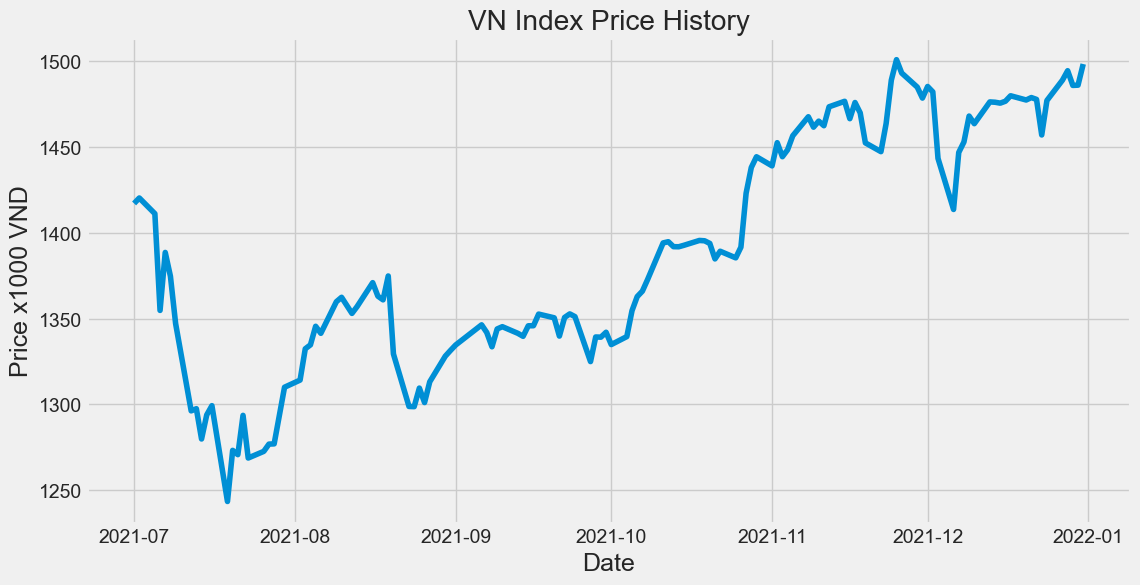

In [4]:
plt.figure(figsize=(12,6))
plt.title('VN Index Price History')
plt.plot(VNIndex['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.show()

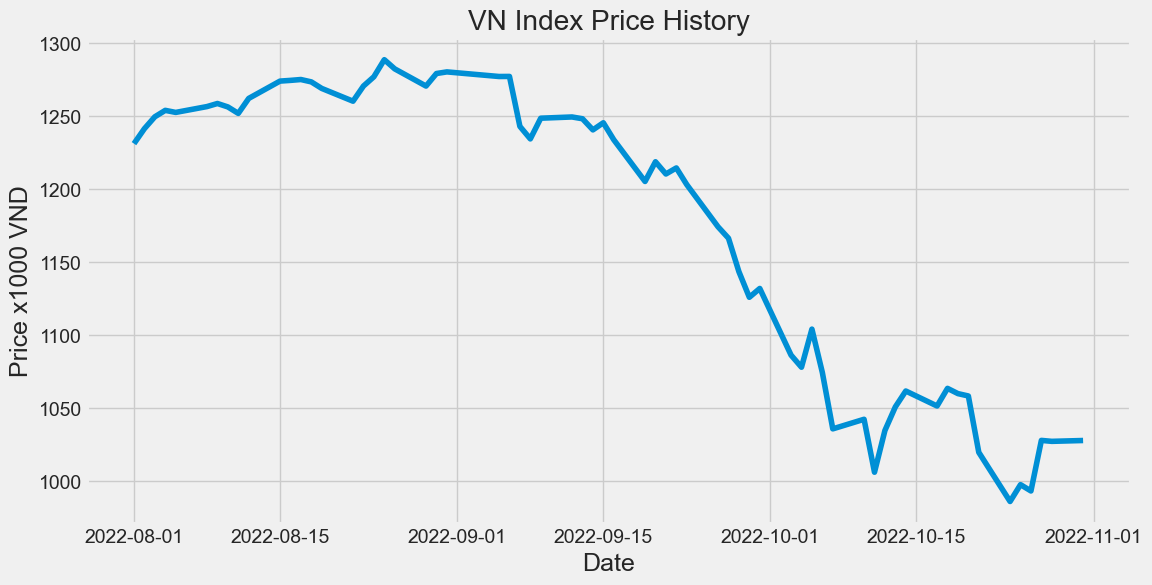

In [5]:
plt.figure(figsize=(12,6))
plt.title('VN Index Price History')
plt.plot(VNItest['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.show()

# 3. Preprocess data

In [6]:
training_data_len = int(np.ceil(len(VNIndex)))
training_data_len

130

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(VNIndex)
# scaled_data

In [8]:
time_step = 5

In [9]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(125, 5, 1)

# 4. Build model

In [10]:
from datetime import datetime

In [11]:
start = datetime.now()
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, input_shape= (x_train.shape[1], 1)))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size = 2, shuffle = False, epochs = 2)
test_data = scaled_data[training_data_len - time_step: , :]

x_test = []
y_test = VNIndex[training_data_len:, :]
for i in range(time_step, len(test_data)):
    x_test.append(test_data[i-time_step:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
end = datetime.now()
run_time = end - start


Epoch 1/2
63/63 [==============================] - 8s 21ms/step - loss: 0.0371
Epoch 2/2
63/63 [==============================] - 1s 21ms/step - loss: 0.0142


InvalidIndexError: (slice(130, None, None), slice(None, None, None))

In [ ]:
print("Run time for LSTM model: ", run_time)

Run time for LSTM model:  0:00:04.532769


In [ ]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, input_shape= (x_train.shape[1], 1)))
model.add(Dense(8))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 5, 256)            264192    
                                                                 
 lstm_11 (LSTM)              (None, 128)               197120    
                                                                 
 dense_10 (Dense)            (None, 8)                 1032      
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 462,353
Trainable params: 462,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# 5. Train model

In [ ]:
history = model.fit(x_train, y_train, batch_size = 2, shuffle = False, epochs = 2)

Epoch 1/2
56/56 [==============================] - 3s 11ms/step - loss: 0.0439
Epoch 2/2
56/56 [==============================] - 1s 10ms/step - loss: 0.0188


In [ ]:
rmse = sqrt(mean_squared_error(y_test, predictions))
print('Train RMSE - LSTM: %.3f' % mean_squared_error(y_train, model.predict(x_train)))
print('Test RMSE - LSTM: %.3f' % rmse)

4/4 [==============================] - 0s 9ms/step
Train RMSE - LSTM: 0.024
Test RMSE - LSTM: 14.931


In [ ]:
train = VNIndex[:training_data_len]
valid = VNIndex[training_data_len:]
valid['Predictions'] = predictions
valid

C:\Users\PC\AppData\Local\Temp\ipykernel_21788\3677610517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Price,Predictions
Date,,
2021-12-15,1475.50,1482.951416
2021-12-16,1476.61,1488.165527
2021-12-17,1479.79,1489.883667
2021-12-20,1477.33,1493.415283
2021-12-21,1478.74,1493.701538
2021-12-22,1477.67,1494.184814
2021-12-23,1456.96,1494.860229
2021-12-24,1477.03,1493.842896
2021-12-27,1488.88,1491.977417


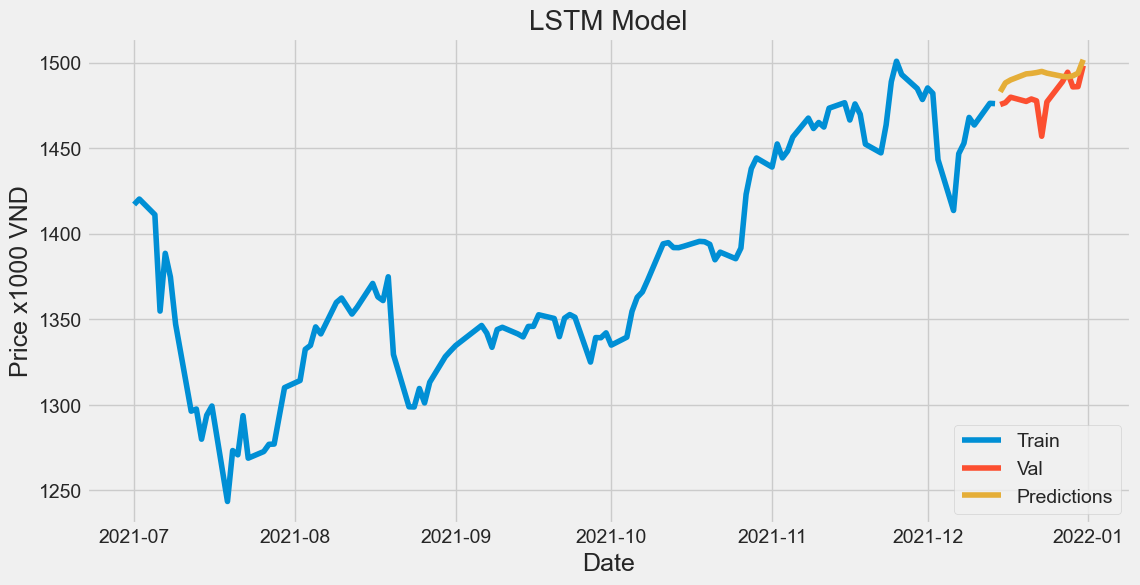

In [ ]:
plt.figure(figsize=(12,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()